## 2 (50점)
고정점 반복법을 이용하여 함수 $g(x) = \frac{1}{2} (\ln(x+1)+1), ~x \geq 0$ 의 고정점을 찾으려 한다.  
고정점 반복법의 오차해석을 이용하여 최소 소숫점 둘째자리까지 정확한 고정점의 값을 산출하시오. 또한 자신이 얻은 값이 왜 소수점 둘째자리까지의 정확성을 보장하는지 그 이유를 서술하시오.  

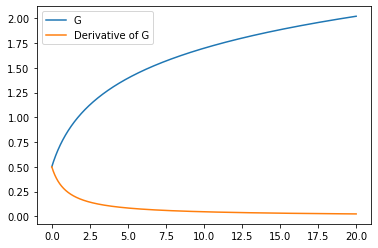

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#define G(x)
def G(x) : 
    return (1/2) * (np.log(x+1)+1) 

def derivative_G(x):
    return (1/2) * (1/(x+1))

#plot G and derivative of G

X = np.linspace(0,20,1000)
plt.plot(X, G(X), label="G")
plt.plot(X, derivative_G(X), label="Derivative of G")
plt.legend()
plt.show()

In [2]:
#We can say that G is 1/2 - Lipschitz
#Therefore we will use Theorem 1.1
#define x1 as 1, then ||x1 - x*|| \leq 3
x1 = 1
#for k-iter ||x_k+1|| \leq L^k ||x1 - x*||
def Bound(L, k):
    return L**(k) * 0.3 # ||x1 - x*|| \leq 0.3

In [3]:
k=1
L = 0.5
while True:
    x1= G(x1)
    err = Bound(L,k)
    print(f"{k}-th iteration / x estimation : {x1} / error : {err:.4f}")
    if err <= 0.001 :
        print(f"Done! final estimation : {x1}")
        break
    k +=1

1-th iteration / x estimation : 0.8465735902799727 / error : 0.1500
2-th iteration / x estimation : 0.8066659042226871 / error : 0.0750
3-th iteration / x estimation : 0.7957415523831965 / error : 0.0375
4-th iteration / x estimation : 0.7927090288670293 / error : 0.0187
5-th iteration / x estimation : 0.7918639498644332 / error : 0.0094
6-th iteration / x estimation : 0.7916281954180133 / error : 0.0047
7-th iteration / x estimation : 0.7915624063951268 / error : 0.0023
8-th iteration / x estimation : 0.7915440459364727 / error : 0.0012
9-th iteration / x estimation : 0.7915389217631057 / error : 0.0006
Done! final estimation : 0.7915389217631057


## 3 (50점)
뉴턴-랩슨법과 오차해석을 이용하여 $\sqrt{2}$의 값을 소숫점 다섯째짜리 이상의 정확도로 계산하고 정당성을 밝히시오.

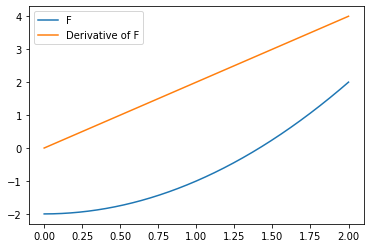

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def F(x) :
    return x**2 -2 

def derivative_F(x) :
    return 2*x

X = np.linspace(0,2,1000)
plt.plot(X, F(X), label="F")
plt.plot(X, derivative_F(X), label="Derivative of F")
plt.legend()
plt.show()

In [5]:
#We will use Corollary 1.3
#Let
x1 = 1.3
R = 0.12
Mr = 1/(2*x1)
B = Mr

def Bound(k, B, Mr, R):
    return (B*Mr/2)**(2**k - 1) * (R**(2**k))

In [6]:
k=1
while True:
    x1= x1 - F(x1) / derivative_F(x1)
    err = Bound(k,B,Mr,R)
    print(f"{k}-th iteration / x estimation : {x1} / error : {err:.6f}")
    if err <= 0.00000001 :
        print(f"Done! final estimation : {x1}")
        break
    k +=1

1-th iteration / x estimation : 1.4192307692307693 / error : 0.001065
2-th iteration / x estimation : 1.4142224306858453 / error : 0.000000
3-th iteration / x estimation : 1.4142135624009007 / error : 0.000000
Done! final estimation : 1.4142135624009007


## 4 (50점)

In [7]:
import numpy as np
# parameters 
Tair = 293
q = 75
rw = 0.006
k = 0.17
h = 12

#setup
xi = 0.1
epsilon_S = 0.01
lr = 0.00001

def derivative_T(x):
    return (q/(2*np.pi)) * ( (1/k)*(1/(rw+x)) - (1/h) * (1/(rw + x))**2)

j=0
epsilon_a = np.inf
while epsilon_a > epsilon_S :
    xnew = xi - lr* derivative_T(xi)
    epsilon_a = abs(xnew - xi) / abs(xnew)
    print(f"{j}-th iteration / x estimation : {xnew} / error : {epsilon_a:.6f}")
    xi = xnew 
    j+=1

print("x*의 값은 : ", xi)

0-th iteration / x estimation : 0.09426119997410934 / error : 0.060882
1-th iteration / x estimation : 0.08824749312680652 / error : 0.068146
2-th iteration / x estimation : 0.08191723520202293 / error : 0.077276
3-th iteration / x estimation : 0.07521762088250597 / error : 0.089070
4-th iteration / x estimation : 0.06808027227463201 / error : 0.104837
5-th iteration / x estimation : 0.060414555132304475 / error : 0.126885
6-th iteration / x estimation : 0.05209740230991169 / error : 0.159646
7-th iteration / x estimation : 0.04295863707825649 / error : 0.212734
8-th iteration / x estimation : 0.03276679090132844 / error : 0.311042
9-th iteration / x estimation : 0.021273349909633414 / error : 0.540274
10-th iteration / x estimation : 0.008901110690634434 / error : 1.389966
11-th iteration / x estimation : 0.006578620472921715 / error : 0.353036
12-th iteration / x estimation : 0.013626031110275738 / error : 0.517202
13-th iteration / x estimation : 0.0036740488159657126 / error : 2.70